# Decision Tree Regressor

In [1]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names


import pandas as pd

df_boston = pd.DataFrame(X,columns=boston.feature_names)
df_boston['target'] = y


/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Predicting house value from a single feature
#X_lstat = df_boston[['LSTAT']]
#y = df_boston[['target']]

In [11]:
from sklearn.model_selection import train_test_split

X=X[y<50]
y=y[y<50]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeRegressor 
import numpy as np

regressor = DecisionTreeRegressor()
parameters = {"max_depth":[3,4], 
              "min_samples_leaf": [10,20,30]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, scoring ='neg_mean_absolute_error') 
gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -3.031836 using {'max_depth': 4, 'min_samples_leaf': 10}
-3.348852 (0.033839) with: {'max_depth': 3, 'min_samples_leaf': 10}
-3.762332 (0.230438) with: {'max_depth': 3, 'min_samples_leaf': 20}
-3.891418 (0.247444) with: {'max_depth': 3, 'min_samples_leaf': 30}
-3.031836 (0.104468) with: {'max_depth': 4, 'min_samples_leaf': 10}
-3.646390 (0.288280) with: {'max_depth': 4, 'min_samples_leaf': 20}
-3.862111 (0.251452) with: {'max_depth': 4, 'min_samples_leaf': 30}


-2.5757882791651934

In [12]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test
pd.DataFrame(error_train).describe()

,0
count,3.430000e+02
mean,-1.470803e-15
std,3.296126e+00
min,-1.495149e+01
25%,-1.751485e+00
50%,-8.235294e-02
75%,1.668702e+00
max,1.994000e+01


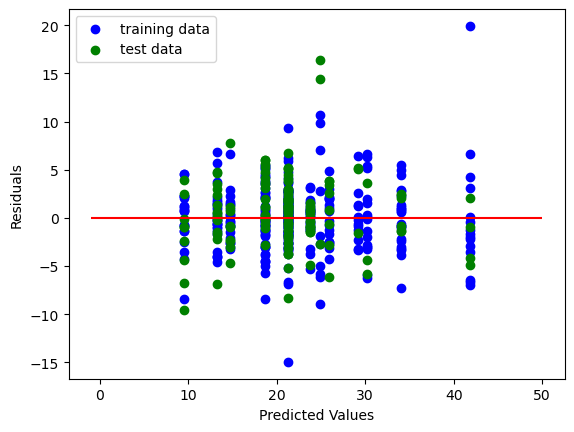

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

In [14]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.378778500380505
MSE train:  10.832770897764664
RMSE train:  3.2913175018166605
r2:  0.9126480689430123
MAE test:  2.5757882791651934
MSE test:  12.686431842661595
RMSE test:  3.561801769141791
r2:  0.8708552451130508


In [16]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_,feature_names=boston.feature_names.tolist())
print(r)


|--- RM <= 6.80
|   |--- LSTAT <= 14.40
|   |   |--- RM <= 6.54
|   |   |   |--- LSTAT <= 7.56
|   |   |   |   |--- value: [23.79]
|   |   |   |--- LSTAT >  7.56
|   |   |   |   |--- value: [21.25]
|   |   |--- RM >  6.54
|   |   |   |--- LSTAT <= 5.83
|   |   |   |   |--- value: [29.22]
|   |   |   |--- LSTAT >  5.83
|   |   |   |   |--- value: [25.86]
|   |--- LSTAT >  14.40
|   |   |--- CRIM <= 6.99
|   |   |   |--- DIS <= 1.99
|   |   |   |   |--- value: [14.75]
|   |   |   |--- DIS >  1.99
|   |   |   |   |--- value: [18.68]
|   |   |--- CRIM >  6.99
|   |   |   |--- CRIM <= 14.14
|   |   |   |   |--- value: [13.19]
|   |   |   |--- CRIM >  14.14
|   |   |   |   |--- value: [9.51]
|--- RM >  6.80
|   |--- RM <= 7.44
|   |   |--- LSTAT <= 9.10
|   |   |   |--- LSTAT <= 5.49
|   |   |   |   |--- value: [34.02]
|   |   |   |--- LSTAT >  5.49
|   |   |   |   |--- value: [30.22]
|   |   |--- LSTAT >  9.10
|   |   |   |--- value: [24.84]
|   |--- RM >  7.44
|   |   |--- value: [41.84]

